In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
import json
import csv
from scipy import stats
import seaborn as sns
import scipy

1\. **Spotting correlations**

Load the remote file:

```bash
https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv
```

with Pandas and create scatter plots with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3
  
Are these features correlated?

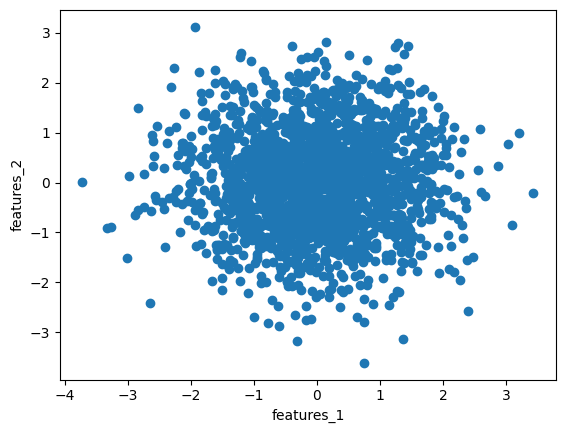

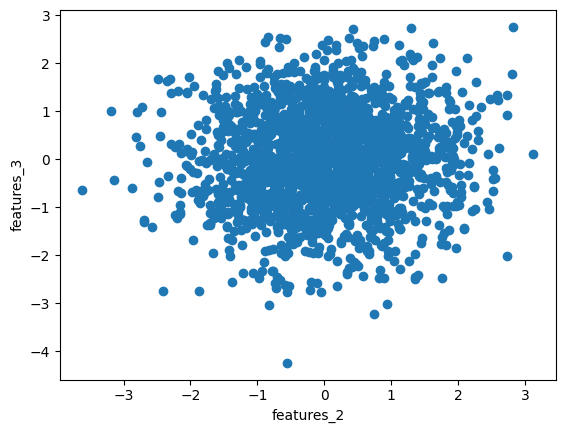

Text(0, 0.5, 'features_3')

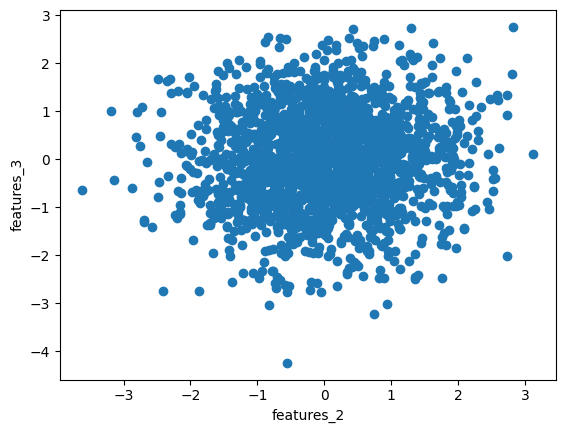

In [77]:
df = pd.read_csv('regression_generated.csv')
plt.scatter(df['features_1'],df['features_2'])
plt.xlabel('features_1')
plt.ylabel('features_2')
plt.show()
plt.scatter(df['features_2'],df['features_3'])
plt.xlabel('features_2')
plt.ylabel('features_3')
plt.show()
plt.scatter(df['features_2'],df['features_3'])
plt.xlabel('features_2')
plt.ylabel('features_3')

2\. **Color-coded scatter plot**

Produce a scatter plot from a dataset with two categories.

* Write a function that generates a 2D dataset consisting of 2 categories. Each category should distribute as a 2D gaussian with a given mean and standard deviation. Set different values of the mean and standard deviation between the two samples.
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below:

In [23]:
#from IPython.display import Image
#Image('images/two_categories_scatter_plot.png')

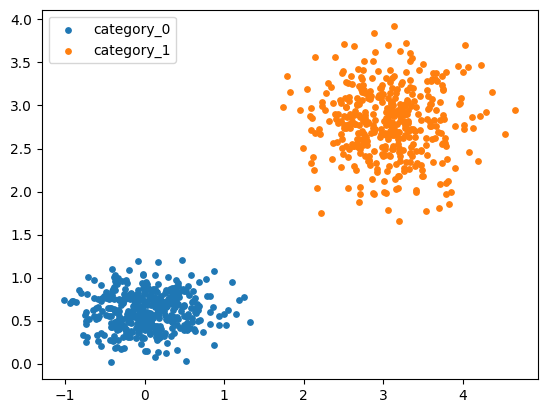

In [22]:
n = 2 
mean_max = [ 4, 3 ]
dev_max  = [ 1, 1 ]
points = 400
# generates a 2D datasets of given number of samples
def generate_2d(points):
    means, devs = [], []
    for i in range(2):
        means.append( np.random.uniform(low=0, high=mean_max[i]) )
        devs.append( np.random.uniform(low=0.2, high=dev_max[i]) )
    return np.random.normal(loc=means[0], scale=devs[0], size=points), np.random.normal(loc=means[1], scale=devs[1], size=points)

# plotting
for i in range(n):
    x,y = generate_2d(points) 
    plt.scatter(x, y, s = 15, label=f"category_{i}")
plt.legend()




3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following pickle file:
```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```
* Inspect the dataset, you'll find two variables (features)
* Convert the content to a Pandas Dataframe
* Clean the sample by selecting the entries (rows) with the absolute values of the variable "residual" smaller than 2
* Plot a Seaborn `jointplot` of "residuals" versus "distances", and use seaborn to display a linear regression. 

Comment on the correlation between these variables.

* Create manually (without using seaborn) the profile histogram for the "distance" variable; choose an appropriate binning.
* Obtain 3 numpy arrays:
  * `x`, the array of bin centers of the profile histogram of the "distance" variable
  * `y`, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * `err_y`, the standard deviation of the of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

/tmp/ipykernel_7021/1276786510.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['bin'] = np.digitize(filtered_df['distances'], bins=bins)
/home/atiye/anaconda3/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<AxesSubplot: xlabel='x', ylabel='residuals'>

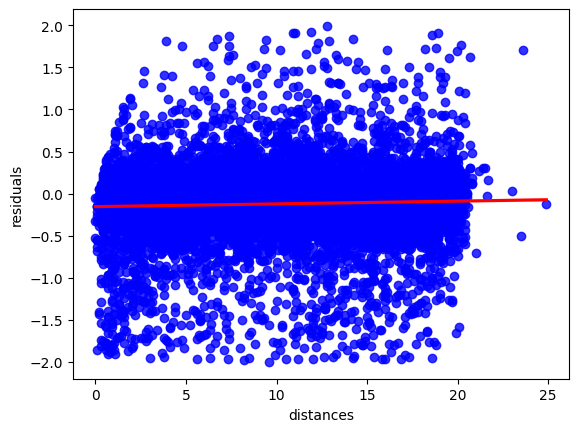

<Figure size 600x400 with 0 Axes>

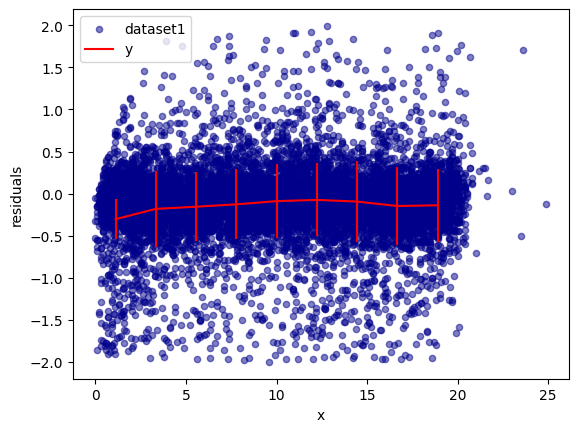

In [69]:
data = np.load('data/residuals_261.pkl', allow_pickle=True)
df = pd.DataFrame(data.item())
# filtering data
filtered_df = df[ df["residuals"].abs() < 2]
#linear regression with seaborn
sns.regplot(x='distances', y='residuals', data=filtered_df,
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

#linear regression without seaborn
bins = np.linspace(0.001, 20, 10)
filtered_df['bin'] = np.digitize(filtered_df['distances'], bins=bins)

x = 0.5 * (bins[:-1] + bins[1:])
bin_width = bins[1] - bins[0]
grouped = filtered_df.groupby('bin')
y=grouped['residuals'].mean()
err_y = filtered_df.groupby('bin')['residuals'].std()

result = pd.DataFrame()

result['x']=x
result['y']=y
result['err_y']=err_y

fig = plt.figure(figsize=(6, 4))

ax = filtered_df.plot.scatter(x='distances', y='residuals', c='DarkBlue', alpha=0.5, label='dataset1')

result.plot(x='x', y='y', yerr='err_y',   capsize=0, color='red', ax=ax)



4\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn):

* Fill a numpy array `x` of length N (with $N=\mathcal{O}(100)$) with a variable normally distributed, with a given mean and standard deviation
* Fill an histogram in pyplot taking proper care of the aesthetic:
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* For every element of `x`, create a gaussian with the mean corresponding to the element value and the standard deviation as a parameter that can be tuned. The standard deviation default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with `np.sum()`) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method. Superimpose the normalized sum of all gaussians to the first histogram.


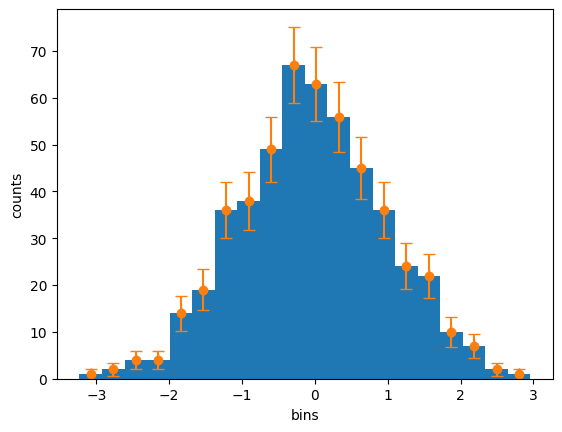

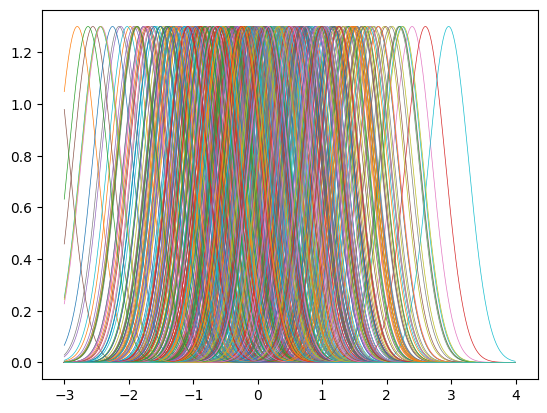

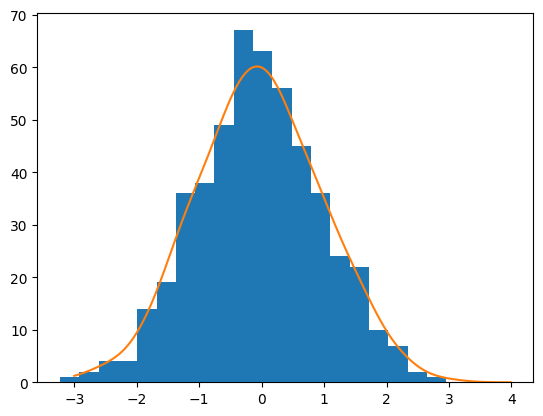

In [52]:
import numpy as np
import numpy.random as npr
from scipy.stats import norm
from scipy.integrate import trapz

npr.seed(123)

N = 500
std = 1
mean = 0

x = npr.normal(loc = mean, scale = std, size = N)

n, bins, _ = plt.hist(x, bins=20)
plt.ylabel('counts')
plt.xlabel('bins')


mean_bins = 1/2 * ( bins[1:]+bins[:-1])
err = np.sqrt(np.abs(n))

plt.errorbar(mean_bins, n, xerr = 0, yerr = err, fmt='o',capthick=1, capsize=4)
plt.show()

k = np.arange(-3,4,0.01)
std = 1.06*x.std()*np.power(len(x),-1/5)

[plt.plot(k,norm.pdf(k,x[i],scale = std), lw=0.5) for i in range(len(x))]
plt.show()

m = np.sum([norm.pdf(k,x[i],scale = std) for i in range(len(x))],axis=0)

norm = trapz(m,k)
normhist = (bins[1]-bins[0])*np.sum(n)

g = m*normhist/norm

plt.hist(x, bins=20)
plt.plot(k,g)
plt.show()